<h1><u>Simple Data exploration with dataset Advertising</u></h1>
<h3>Nov 2017</h3>

In [162]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
os.getcwd()

'/Users/talbotm/Documents/McGill'

In [7]:
df = pd.read_csv('data/Advertising.csv',index_col = "index")

In [80]:
df.tail(5)
df.head(5)

,TV,radio,newspaper,sales
index,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [166]:
# removing outliers
IQR = df.describe().loc['75%',:] - df.describe().loc['25%',:] 
IQR_range = pd.DataFrame()
IQR_range['low'] = df.describe().loc['25%',:] - (1.5 * IQR)
IQR_range['high'] = df.describe().loc['75%',:] + (1.5 * IQR)
IQR_range

preserved_rows = np.ones(df.shape[0],dtype =bool)
for i in IQR_range.index:
    preserved_rows = ((df[i]<IQR_range.loc[i, 'high']) & preserved_rows)
    preserved_rows = ((df[i]>IQR_range.loc[i, 'low']) & preserved_rows)
    
df_center = df[preserved_rows]
df_center.describe()

TV
radio
newspaper
sales


,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


In [146]:
# examining outliers : 
outliers = list(preserved_rows[preserved_rows == False].index)
print(outliers)
outliers = [x-1 for x in outliers]
df.iloc[outliers, :]

[17, 102]


,TV,radio,newspaper,sales
index,,,,
17,67.8,36.6,114.0,12.5
102,296.4,36.3,100.9,23.8


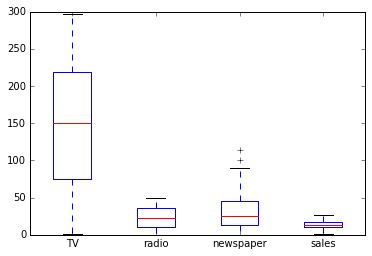

In [13]:
df.plot(kind='box')

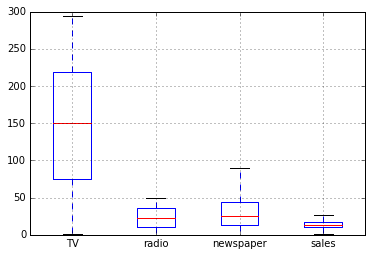

In [113]:
df_center.boxplot();

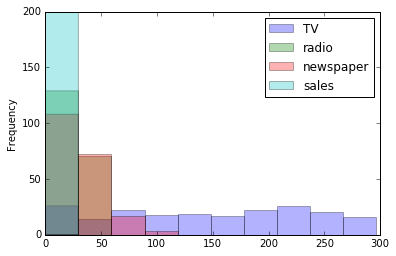

In [20]:
df.plot.hist(alpha = 0.3)

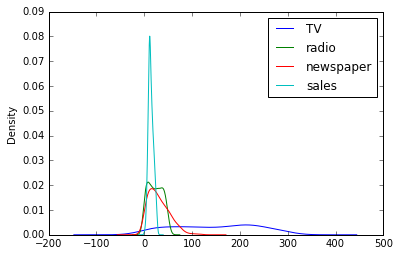

In [19]:
df.plot.kde()

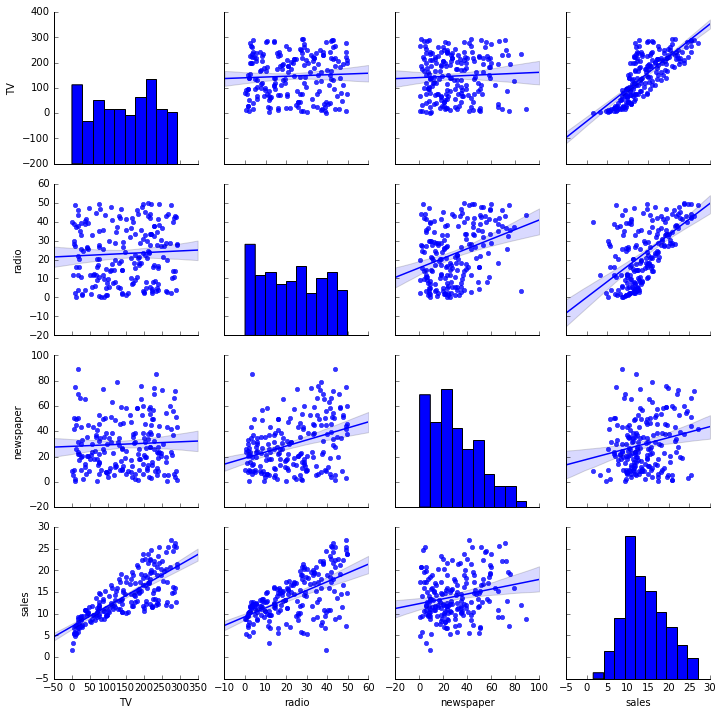

In [147]:
sns.pairplot(df_center, kind='reg')

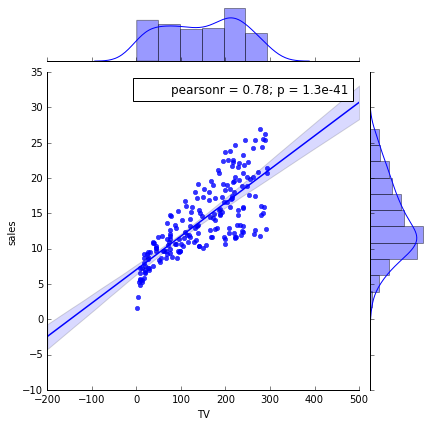

In [163]:
df.columns
sns.jointplot(x='TV', y='sales', kind = 'reg', data=df_center);

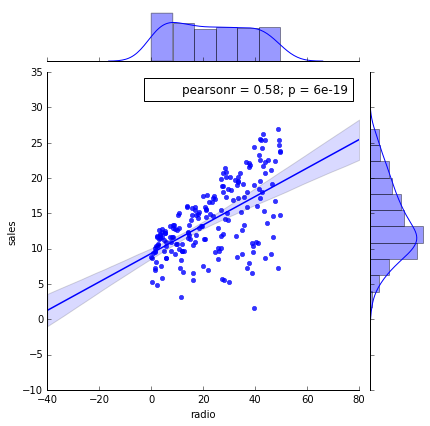

In [164]:
sns.jointplot(x='radio', y='sales', kind = 'reg', data = df_center)

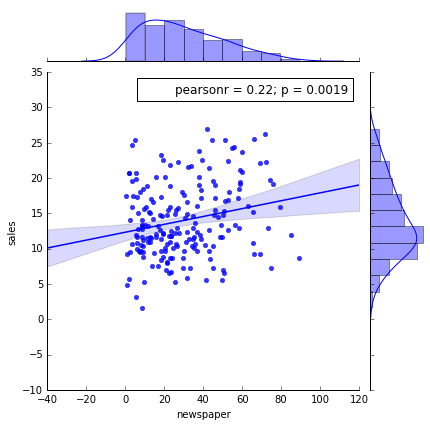

In [165]:
sns.jointplot(x='newspaper', y='sales', kind = 'reg', data = df_center)

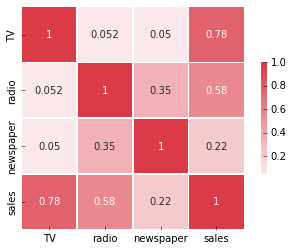

In [159]:
corr = df_center.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot= True, cmap = cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})